<a href="https://colab.research.google.com/github/mescobar82/inflation/blob/main/Inflation%26TortilaPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SETUP

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# where to save figures

PROJECT_ROOT_DIR = "."
ID = "exploration"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# DOWNLOAD DATA

In [ ]:
import urllib.request
Mes=1
Anio=2021
url0="http://www.economia-sniim.gob.mx/TortillaMesPorDia.asp?Cons=D&prod=2&dqMesMes="
url1="&dqAnioMes="
url2="preEdo=Edo&Formato=Xls&submit=Ver+Resultados"
datapath=os.path.join("datasets","tortilla","")
filename="tortilla_mes_"+str(Mes)+"_anio_"+str(Anio)+".csv"
DOWNLOAD_ROOT = url0+str(Mes)+url1+str(Anio)+url2
os.makedirs(datapath, exist_ok=True)
url = DOWNLOAD_ROOT
urllib.request.urlretrieve(url, datapath)

('datasets/overdose/overdoses.csv',
 <http.client.HTTPMessage at 0x7fca560379d0>)

# Pandas


## Generate Dataset

In [ ]:
datapath=os.path.join("datasets","overdose","")

filename="overdoses.csv"
overdose_ds=pd.read_csv(datapath+filename, parse_dates={'Date':[1,2]},usecols=[0,1,2,4,5],thousands=',')
print(overdose_ds)

            Date State                                          Indicator  \
0     2015-04-01    AK  Natural, semi-synthetic, & synthetic opioids, ...   
1     2015-04-01    AK                       Percent with drugs specified   
2     2015-04-01    AK           Natural & semi-synthetic opioids (T40.2)   
3     2015-04-01    AK                                    Cocaine (T40.5)   
4     2015-04-01    AK         Synthetic opioids, excl. methadone (T40.4)   
...          ...   ...                                                ...   
49048 2021-09-01    YC      Psychostimulants with abuse potential (T43.6)   
49049 2021-09-01    YC                                   Number of Deaths   
49050 2021-09-01    YC                        Opioids (T40.0-T40.4,T40.6)   
49051 2021-09-01    YC  Natural, semi-synthetic, & synthetic opioids, ...   
49052 2021-09-01    YC         Synthetic opioids, excl. methadone (T40.4)   

         Data Value  
0               NaN  
1         88.095238  
2        

## Clean Data

### Clean Columns

### Clean Rows

In [ ]:
rows_to_drop=dict(State=['YC','NC'], Indicator=["Percent with drugs specified", "Number of Deaths"])
#print(rows_to_drop.keys())
for key in rows_to_drop.keys():
    #print(key)
    #print(rows_to_drop[key])
    for value in list(rows_to_drop[key]):
    #    print(value)
        overdose_ds.drop(overdose_ds[overdose_ds[key] == value].index, inplace = True)

overdose_ds['Data Value'] = overdose_ds['Data Value'].fillna(0)
#overdose_ds['Data Value'] = overdose_ds['Data Value'].astype(int)
States=set(overdose_ds.State)

#for St in States:
    #print(St)
    #print(States)
#print(overdose_ds.head)

#Explore Data
We will try to figure out if some of the indicators are useful or not
We start with California

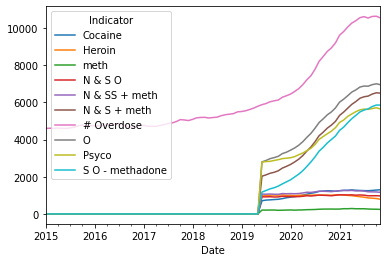

In [ ]:
df = overdose_ds[overdose_ds.State=="CA"].pivot(index='Date', columns='Indicator', values='Data Value')
Drugs=set(df.columns)
#print(Drugs)
df=df.rename(columns={'Heroin (T40.1)':'Heroin', 'Cocaine (T40.5)':'Cocaine', 'Number of Drug Overdose Deaths':'# Overdose', 'Opioids (T40.0-T40.4,T40.6)':'O', 'Natural & semi-synthetic opioids (T40.2)':'N & S O', 'Synthetic opioids, excl. methadone (T40.4)':'S O - methadone', 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)':'N & S + meth', 'Methadone (T40.3)':'meth', 'Psychostimulants with abuse potential (T43.6)':'Psyco', 'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)':'N & SS + meth'})
#df.info()
df.plot()
#df.set_index('Date', inplace=True)
#print(type(df.index))
#plt.plot(df.index, df['Cocaine (T40.5)'])
#df['Cocaine (T40.5)'].plot()

We continue with all US



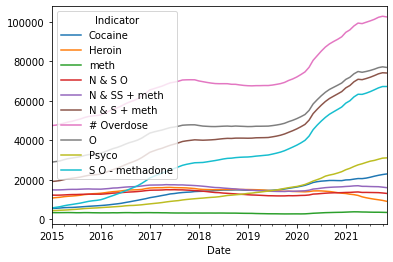

In [ ]:
df = overdose_ds[overdose_ds.State=="US"].pivot(index='Date', columns='Indicator', values='Data Value')
Drugs=set(df.columns)
df=df.rename(columns={'Heroin (T40.1)':'Heroin', 'Cocaine (T40.5)':'Cocaine', 'Number of Drug Overdose Deaths':'# Overdose', 'Opioids (T40.0-T40.4,T40.6)':'O', 'Natural & semi-synthetic opioids (T40.2)':'N & S O', 'Synthetic opioids, excl. methadone (T40.4)':'S O - methadone', 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)':'N & S + meth', 'Methadone (T40.3)':'meth', 'Psychostimulants with abuse potential (T43.6)':'Psyco', 'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)':'N & SS + meth'})
df.plot()


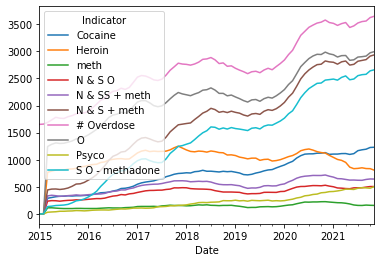

In [ ]:
df = overdose_ds[overdose_ds.State=="IL"].pivot(index='Date', columns='Indicator', values='Data Value')
Drugs=set(df.columns)
df=df.rename(columns={'Heroin (T40.1)':'Heroin', 'Cocaine (T40.5)':'Cocaine', 'Number of Drug Overdose Deaths':'# Overdose', 'Opioids (T40.0-T40.4,T40.6)':'O', 'Natural & semi-synthetic opioids (T40.2)':'N & S O', 'Synthetic opioids, excl. methadone (T40.4)':'S O - methadone', 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)':'N & S + meth', 'Methadone (T40.3)':'meth', 'Psychostimulants with abuse potential (T43.6)':'Psyco', 'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)':'N & SS + meth'})
df.plot()
